W pracy domowej 2 należy wybrać jeden z podanych niżej wariantów:


1. Dla zbioru danych CAR DETAILS (w kaggle będzie to plik z góry) spróbuj przewidzieć cenę pojazdu.

Opis zbioru:

_Ten zbiór danych pojazdów, przydatny do przewidywania cen, zawiera informacje o samochodach i motocyklach wymienionych na CarDekho.com. Dane znajdują się w pliku CSV, który zawiera następujące kolumny: model, rok, cena sprzedaży, cena w salonie, przejechane kilometry, rodzaj paliwa, typ sprzedawcy, skrzynia biegów i liczba poprzednich właścicieli._
https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho/data

2. Dla zbioru danych z opiniami pasażerów linii lotniczych z forów internetowych zamodeluj satysfakcję klienta.
Zbiór jest już podzielony na trening i test. 

https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv


Niech rozwiązanie będzie:
- autorskie
- opisane
- zawierało zastosowanie kilku algorytmów, ich ocenę oraz optymalizację
- wnioski końcowe.

__Termin: 12.06__

Wyniki przez terminem można konsultować - wystarczy napisać na Slacku:)

# Przewidzywanie cen pojazdu

In [12]:
import pandas as pd

# Wczytanie danych
file_path = 'car_data.csv'
car_data = pd.read_csv(file_path)

# Wyświetlenie pierwszych kilku wierszy danych
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Przeprowadzenie wstępnej analizy danych:**

- Sprawdzenie typów danych każdej kolumny oraz sprawdzenie czy występują brakujące wartości.
- Podsumowanie statystyczne danych.
- Analiza unikalnych wartości dla kolumn kategorycznych.

In [13]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
# Analiza unikalnych wartości dla kolumn kategorycznych
unique_car_name = car_data['Car_Name'].unique()
unique_fuel_type = car_data['Fuel_Type'].unique()
unique_seller_type = car_data['Seller_Type'].unique()
unique_transmission = car_data['Transmission'].unique()
unique_owner = car_data['Owner'].unique()
unique_car_name, unique_fuel_type, unique_seller_type, unique_transmission, unique_owner

(array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
        's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
        '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
        'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
        'camry', 'land cruiser', 'Royal Enfield Thunder 500',
        'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
        'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
        'Royal Enfield Thunder 350', 'KTM 390 Duke ',
        'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
        'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
        'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
        'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
        'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
        'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
        'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
        'TVS A

Wstępna analiza danych pokazała następujących informacji:

Zbiór danych zawiera 301 rekordy, a każdy rekord ma 9 atrybutów.
Wszystkie rekordy są kompletne, nie ma brakujących wartości.

**Kolumny to:**
- Car_Name (nazwa samochodu, tekst)
- Year (rok zakupu, liczbowy)
- Selling_Price (cena sprzedaży, liczbowy)
- Present_Price (obecna cena salonowa, liczbowy)
- Kms_Driven (przebieg w kilometrach, liczbowy)
- Fuel_Type (typ paliwa, kategoria)
- Seller_Type (typ sprzedawcy, kategoria)
- Transmission (typ przekładni, kategoria)
- Owner (ilość poprzednich właścicieli, liczbowy)

**Unikalne wartości dla kolumn kategorycznych:**

- Fuel_Type: ['Petrol', 'Diesel', 'CNG']
- Seller_Type: ['Dealer', 'Individual']
- Transmission: ['Manual', 'Automatic']
- Owner: [0, 1, 3]

**Następnie przetwarzanie danych:**

- Kodowanie zmiennych kategorycznych do postaci numerycznej, aby mogły być użyte w modelach regresyjnych.
- Dodanie nowej cechy (wiek samochodu = różnicę między obecnym rokiem a rokiem zakupu).

In [16]:
from sklearn.preprocessing import LabelEncoder
import datetime

# Dodanie nowej cechy - wiek samochodu w latach
current_year = datetime.datetime.now().year
car_data['Car_Age'] = current_year - car_data['Year']

# Kodowanie zmiennych kategorycznych
label_encoders = {}
categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']
for data in categorical_columns:
    le = LabelEncoder()
    car_data[data] = le.fit_transform(car_data[data]) #Fit label encoder and return encoded labels
    label_encoders[data] = le

# Podgląd danych po przekształceniach
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,ritz,2014,3.35,5.59,27000,2,0,1,0,10
1,sx4,2013,4.75,9.54,43000,1,0,1,0,11
2,ciaz,2017,7.25,9.85,6900,2,0,1,0,7
3,wagon r,2011,2.85,4.15,5200,2,0,1,0,13
4,swift,2014,4.60,6.87,42450,1,0,1,0,10


In [17]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,1.787375,0.352159,0.867110,0.043189,10.372093
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,2012.000000,0.900000,1.200000,15000.000000,2.000000,0.000000,1.000000,0.000000,8.000000
50%,2014.000000,3.600000,6.400000,32000.000000,2.000000,0.000000,1.000000,0.000000,10.000000
75%,2016.000000,6.000000,9.900000,48767.000000,2.000000,1.000000,1.000000,0.000000,12.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000,21.000000


 Podział danych na zestaw treningowy i testowy

In [18]:
from sklearn.model_selection import train_test_split

# Definicja cech (X) i zmiennej celu (y)
X = car_data.drop(columns=['Car_Name', 'Selling_Price', 'Year'])  # Usuwamy nazwę samochodu, rok zakupu jako cechy oraz cenę jako zmienną celu
y = car_data['Selling_Price']

# Podział danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # 25% danych na zestaw testowy

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((225, 7), (76, 7), (225,), (76,))

Dane zostały pomyślnie podzielone na zestaw treningowy i testowy. Zestaw treningowy składa się z 225 rekordów, a zestaw testowy z 76 rekordów. Każdy zestaw zawiera 7 cech.

## Następne kroki
Teraz, gdy dane są przygotowane i podzielone, przejdziemy do trenowania różnych modeli regresji w celu przewidywania ceny sprzedaży samochodów. Wykorzystamy:

- Regresja liniowa
- Regresja Ridge
- Regresja Lasso
- Drzewo decyzyjne
- Lasy losowe
- Gradient Boosting

Dla każdego z tych modeli ocenimy ich skuteczność za pomocą metryk takich jak RMSE (Root Mean Square Error) oraz R^2 (współczynnik determinacji)

## **Co to jest RMSE** 
- jest miarą średniego błędu kwadratowego między przewidywanymi a rzeczywistymi wartościami. To metryka oceniająca różnicę między wartościami przewidywanymi przez model a obserwowanymi wartościami, które model próbuje przewidzieć.
 
 **Jak interpretować**: Niższa wartość RMSE wskazuje na lepszą wydajność modelu

## **Co to jest R^2** 
- jest statystyką, która mierzy, jak dobrze przyszłe próbki będą przewidywane przez model.

 **Jak interpretować**: Wartość R^2 mieści się zazwyczaj między 0 a 1. Im wyższa wartość R^2, tym lepiej model pasuje do danych


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Przygotowanie modeli z domyślnymi parametrami
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    }

In [21]:
# Funkcja do trenowania i oceny modeli
def train_evaluate(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)  # Trenowanie modelu
        y_pred = model.predict(X_test)  # Predykcja na danych testowych
        # Wykres rozrzutu
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Linia idealna
        plt.xlabel('Rzeczywiste wartości')
        plt.ylabel(f'Przewidywane wartości model:{name}')
        plt.title(f'Wykres rozrzutu przewidywań vs rzeczywiste wartości ({name})')
        plt.show()
        rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Obliczenie RMSE
        r2 = r2_score(y_test, y_pred)  # Obliczenie R^2
        results[name] = {'RMSE': rmse, 'R2': r2}
    return results

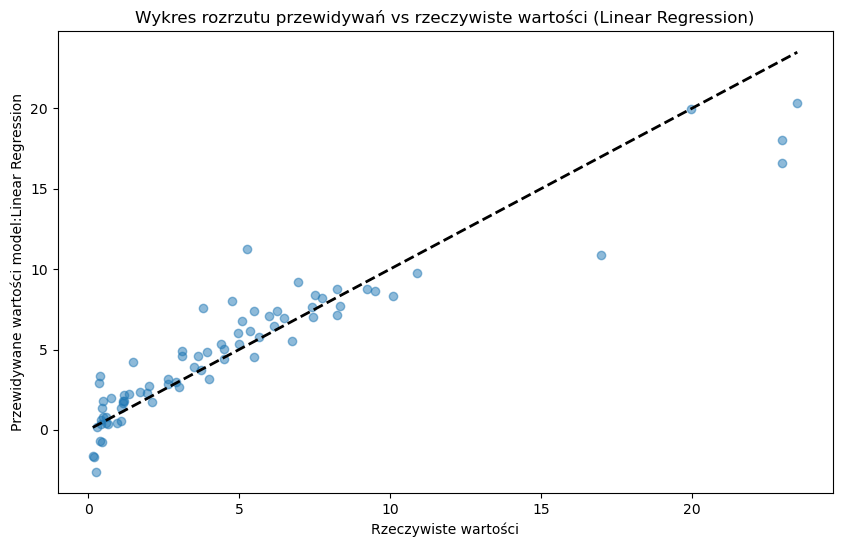

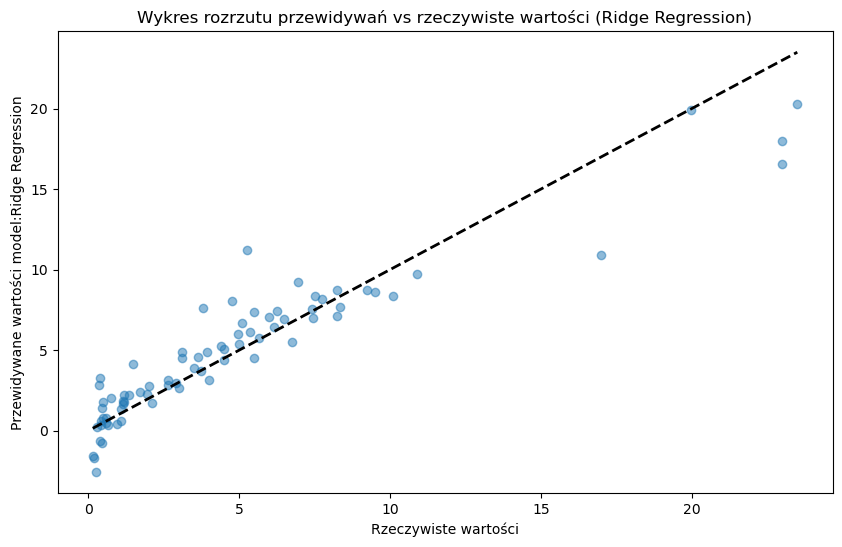

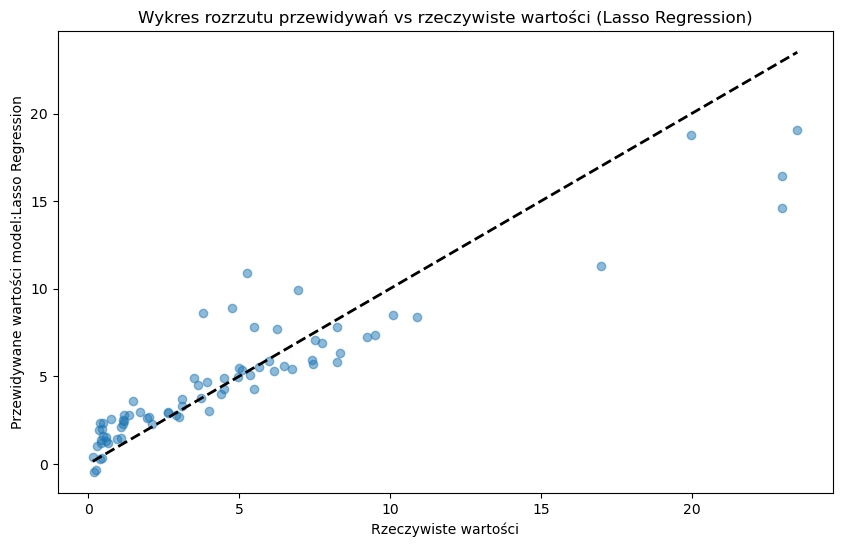

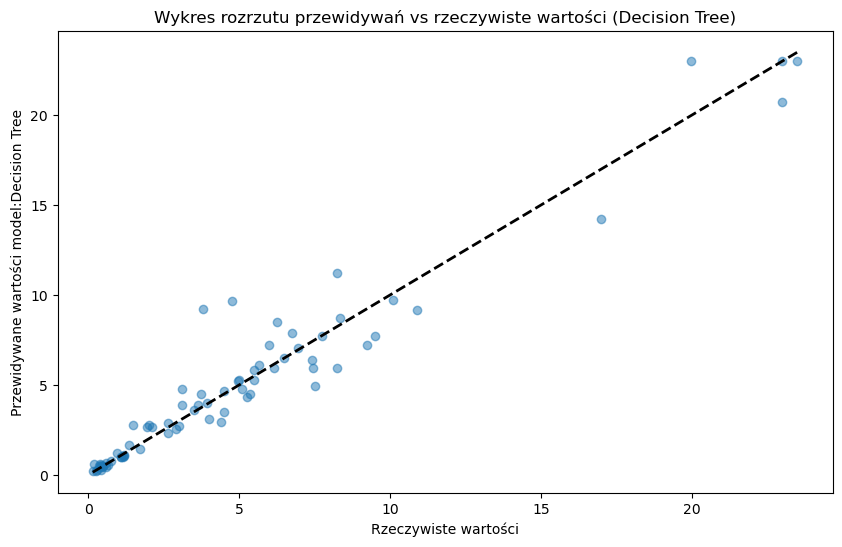

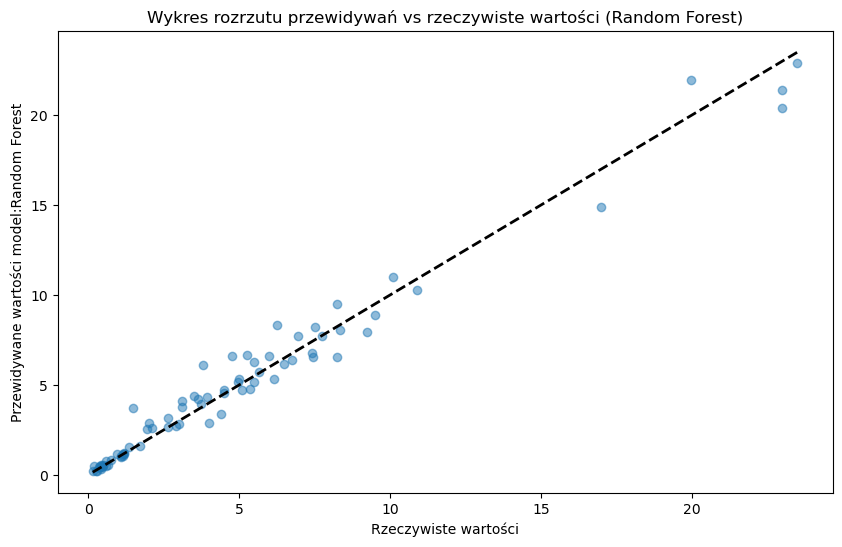

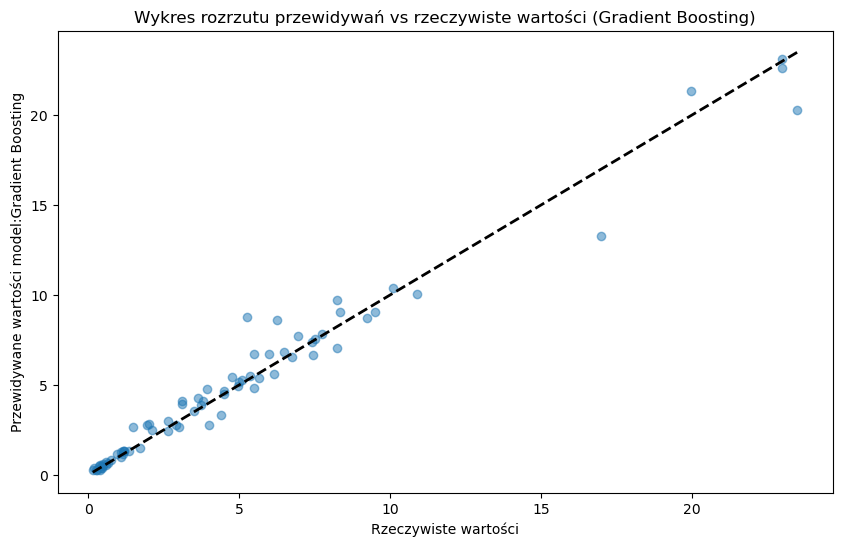

{'Linear Regression': {'RMSE': 1.8524590060934085, 'R2': 0.8750976760292413},
 'Ridge Regression': {'RMSE': 1.8494501960918976, 'R2': 0.8755030854472172},
 'Lasso Regression': {'RMSE': 2.1105180681526687, 'R2': 0.8378744524094422},
 'Decision Tree': {'RMSE': 1.3180587799367756, 'R2': 0.9367671343888637},
 'Random Forest': {'RMSE': 0.8704107681222459, 'R2': 0.972424600227807},
 'Gradient Boosting': {'RMSE': 0.9200123458418595, 'R2': 0.969192204876585}}

In [22]:
results = train_evaluate(models, X_train, y_train, X_test, y_test)
results

In [23]:
df_results = pd.DataFrame(results)
df_results

,Linear Regression,Ridge Regression,Lasso Regression,Decision Tree,Random Forest,Gradient Boosting
RMSE,1.852459,1.849450,2.110518,1.318059,0.870411,0.920012
R2,0.875098,0.875503,0.837874,0.936767,0.972425,0.969192


## **Dobór hiperparametrów**

Użycie GridSearchCV do znajdowania najlepszych parametrów dla modeli.

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Ustawienia dla Ridge Regression
ridge_params = {
    'alpha': [0.1, 1, 10, 100, 1000]  # Różne wartości parametru regularyzacji
}

# Ustawienia dla Lasso Regression
lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]  # Różne wartości parametru regularyzacji
}

# Ustawienia dla Decision Tree
dt_params = {
    'max_depth': [3, 5, 7, 10], # Głębokość drzewa
    'min_samples_split': [2, 5, 10], # Minimalna liczba próbek wymagana do podziału więzła wewnętrznego
    'min_samples_leaf': [1, 2, 4], # Minimalna liczba próbek wymagana, aby znajdować się w węzle liścia
    'max_features': ['sqrt', 'log2', None] # Liczba funkcji, które należy wziąć pod uwagę
}

# Ustawienia dla Random Forest
rf_params = {
    'n_estimators': [50, 100, 200, 300],  # Liczba drzew
    'max_features': [None, 'sqrt'],  # Maksymalna liczba cech rozpatrywanych przy podziale
    'max_depth': [3, 5, 7, 10]  # Maksymalna głębokość drzewa
}

# Ustawienia dla Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 200, 300], 
    'learning_rate': [0.05, 0.1, 0.2], # Szybkość uczenia się
    'max_depth': [3, 5, 7] # Liczba etapów wzmacniania do wykonania
}

In [26]:
def tune_hyperparameters(model, params, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', verbose=1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, np.sqrt(-grid_search.best_score_)

# Ridge Regression tuning
best_ridge_params, best_ridge_score = tune_hyperparameters(Ridge(), ridge_params, X_train, y_train)
print("Best Ridge params:", best_ridge_params)
print("Best Ridge RMSE:", best_ridge_score)

# Lasso Regression tuning
best_lasso_params, best_lasso_score = tune_hyperparameters(Lasso(), lasso_params, X_train, y_train)
print("Best Lasso params:", best_lasso_params)
print("Best Lasso RMSE:", best_lasso_score)

best_dt_params, best_dt_score = tune_hyperparameters(DecisionTreeRegressor(), dt_params, X_train, y_train)
print("Best Decision Tree params:", best_dt_params)
print("Best Decision Tree RMSE:", best_dt_score)

# Random Forest tuning
best_rf_params, best_rf_score = tune_hyperparameters(RandomForestRegressor(), rf_params, X_train, y_train)
print("Best RF params:", best_rf_params)
print("Best RF RMSE:", best_rf_score)

# Gradient Boosting tuning
best_gb_params, best_gb_score = tune_hyperparameters(GradientBoostingRegressor(), gb_params, X_train, y_train)
print("Best GB params:", best_gb_params)
print("Best GB RMSE:", best_gb_score)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Ridge params: {'alpha': 10}
Best Ridge RMSE: 2.2969058253746417
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Lasso params: {'alpha': 0.01}
Best Lasso RMSE: 2.3157280838850243
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Decision Tree params: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree RMSE: 2.1498094783423385
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best RF params: {'max_depth': 10, 'max_features': None, 'n_estimators': 50}
Best RF RMSE: 1.808779877221524
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best GB params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best GB RMSE: 1.7910930623419925


In [27]:
# Strojenie hiperparametrów z uaktualnionymi parametrami
def tune_hyperparameters(model, params, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', verbose=1, error_score='raise')
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, np.sqrt(-grid_search.best_score_)

In [28]:
#Przygotowanie modeli z nowymi parametrami
updated_models = {
    "Ridge Regression": Ridge(alpha=0.1),
    "Lasso Regression": Lasso(alpha=0.001),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5),
    "Random Forest": RandomForestRegressor(max_depth=7, max_features=None, n_estimators=50),
    "Gradient Boosting": GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=100),
    }

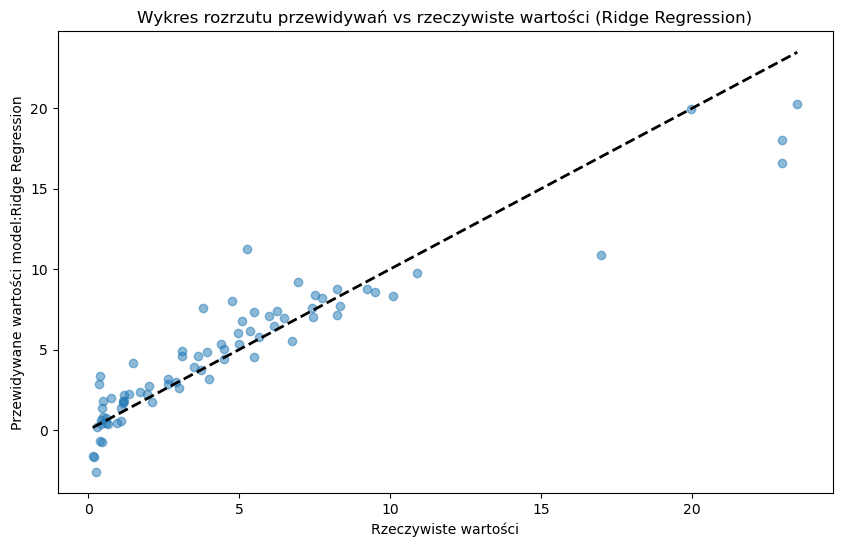

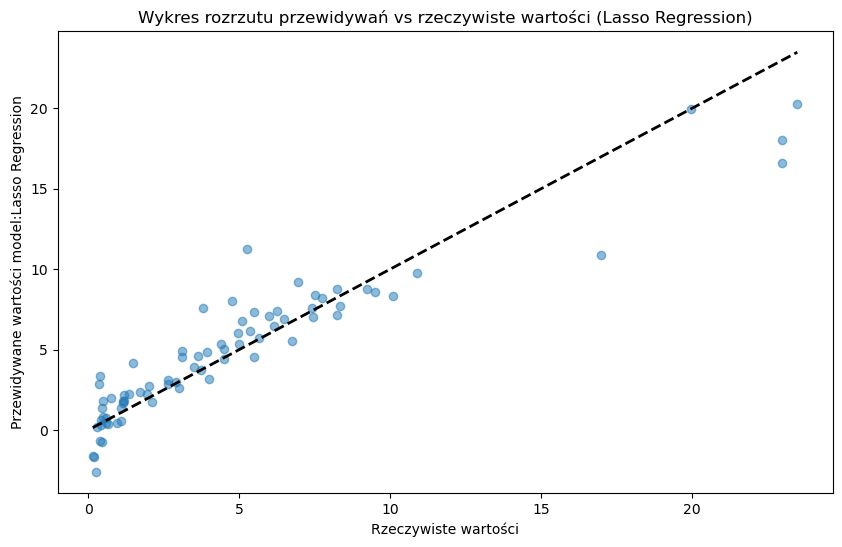

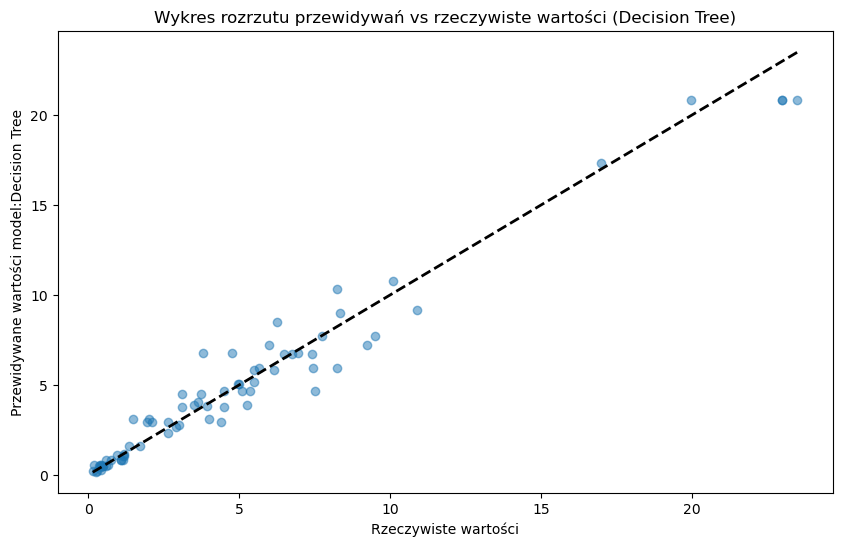

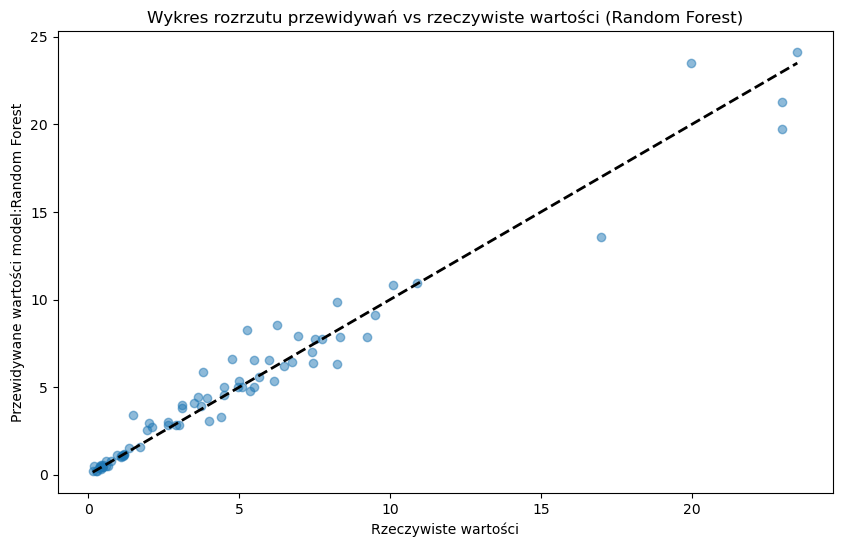

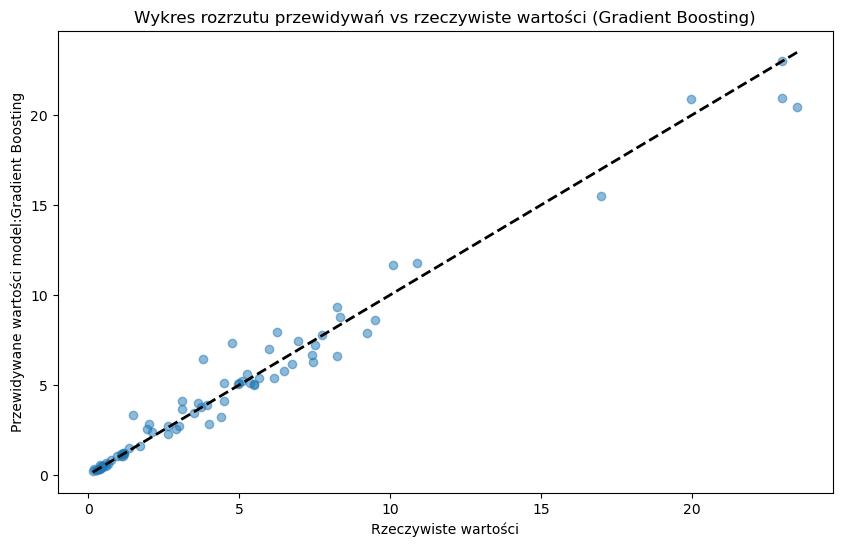

{'Ridge Regression': {'RMSE': 1.8521095762136692, 'R2': 0.8751447923082558},
 'Lasso Regression': {'RMSE': 1.8518226984234163, 'R2': 0.8751834675708439},
 'Decision Tree': {'RMSE': 1.0558361762448054, 'R2': 0.9594242661341817},
 'Random Forest': {'RMSE': 1.058001936958328, 'R2': 0.9592576352485808},
 'Gradient Boosting': {'RMSE': 0.874096833476118, 'R2': 0.9721905499267264}}

In [29]:
updated_results = train_evaluate(updated_models, X_train, y_train, X_test, y_test)
updated_results

In [30]:
df_updated_results = pd.DataFrame(updated_results)
df_updated_results

,Ridge Regression,Lasso Regression,Decision Tree,Random Forest,Gradient Boosting
RMSE,1.852110,1.851823,1.055836,1.058002,0.874097
R2,0.875145,0.875183,0.959424,0.959258,0.972191


In [31]:
df_results

,Linear Regression,Ridge Regression,Lasso Regression,Decision Tree,Random Forest,Gradient Boosting
RMSE,1.852459,1.849450,2.110518,1.318059,0.870411,0.920012
R2,0.875098,0.875503,0.837874,0.936767,0.972425,0.969192


# Analiza wyników

Analizując wyniki obu tabel, które przedstawiają **RMSE** i **R^2** dla różnych modeli regresyjnych, możemy dokonać wyboru najlepszego modelu do przewidywania cen samochodów.

- **Gradient Boosting**
Gradient Boosting osiągnął najniższe RMSE (0.874097) i najwyższe R^2 (0.972191), co wskazuje na bardzo dobrą zdolność modelu do przewidywania cen z dużą dokładnością.

- **Random Forest**
Random Forest również wykazuje wysokie wartości R^2 (0.959258) oraz niskie RMSE (1.058002), co pokazuje, że jest skutecznym modelem. Ale z domyślnymi ustawieniami ma znacznie niższe RMSE (0.87) oraz wyższe R^2, co może sugerować pewne przeuczenie lub niewystarczające dopasowanie.

- **Desicion Tree**
Decision Tree pokazuje znaczną poprawę w R^2 (0.959424) w stosunku do domyślnych ustawień, co oznacza lepsze dopasowanie modelu do danych po strojeniu.

- **Regresja Liniowa i jej Warianty (Ridge, Lasso)**
Regresja liniowa oraz jej warianty (Ridge i Lasso) osiągają podobne wyniki w obu tabelach, z R^2 oscylującym wokół 0.87. RMSE jest stabilne i nieznacznie różne pomiędzy modelami.


## Rekomendacje

 **Gradient Boosting**: Jest to zalecany model, jeżeli celem jest maksymalizacja dokładności przewidywań. Jest najlepszym wyborem w przypadkach, gdzie potrzebna jest wysoka precyzja.
  
 **Desicion Tree**: Może być dobrą alternatywą do Gradient Boosting, oferując nieco mniejszą dokładność, ale nadal bardzo dobre wyniki.

 **Regresje Liniowe (Ridge, Lasso)**: Mogą być wykorzystane, gdy zależy nam na szybszym przetwarzaniu i mniejszym skomplikowaniu modelu. Ich dodatkową zaletą jest łatwość interpretacji wyników.



***Dodatkowo***

Wizualizacje dla Gradient Boosting (wykresy rozrzutu, ważność cech), aby lepiej zrozumieć, jak model radzi sobie z danymi i które zmienne mają największe znaczenie.

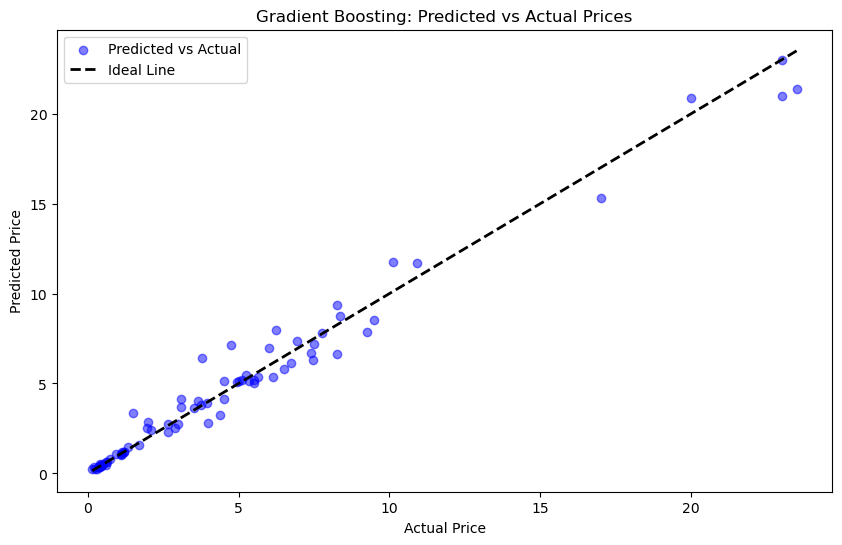

In [32]:
model = GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=100)
model.fit(X_train, y_train)

# Przewidywania modelu
y_pred_gb = model.predict(X_test)

# Tworzenie wykresu rozrzutu
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Gradient Boosting: Predicted vs Actual Prices')
plt.legend()
plt.show()

W kontekście modelowania cen samochodów, ważność cech może ujawnić, czy cechy takie jak przebieg, wiek pojazdu czy typ paliwa mają decydujący wpływ na ceny. Informacje te mogą być wykorzystane do lepszego zrozumienia rynku samochodowego oraz do tworzenia bardziej celowanych strategii cenowych.

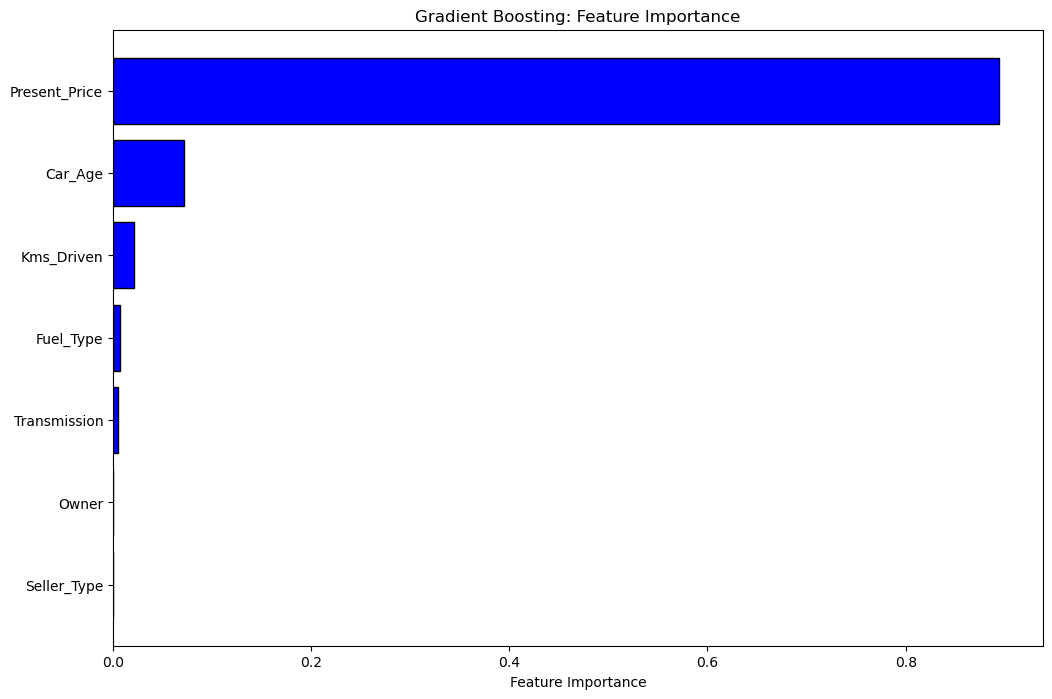

In [33]:
# Ważność cech
feature_importance_gb = model.feature_importances_

# Sortowanie indeksów cech dla lepszej wizualizacji
sorted_idx_gb = np.argsort(feature_importance_gb)

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb], align='center', color='blue', edgecolor='black')
plt.yticks(range(len(sorted_idx_gb)), np.array(X_test.columns)[sorted_idx_gb])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting: Feature Importance')
plt.show()

**Praca z małą ilością danych, jak te 301 rekordów, może sprawić, że modele nie będą dobrze działać na innych, nowych danych, ponieważ są zbyt specyficzne dla tych, które już znane.**

 ##### Oto kolejny kotek, choć trzeba przyznać, że jako pomocnik nie jest zbyt użyteczny – z nim zawsze chce się tylko spać, gdy przychodzi i mruczy.😸

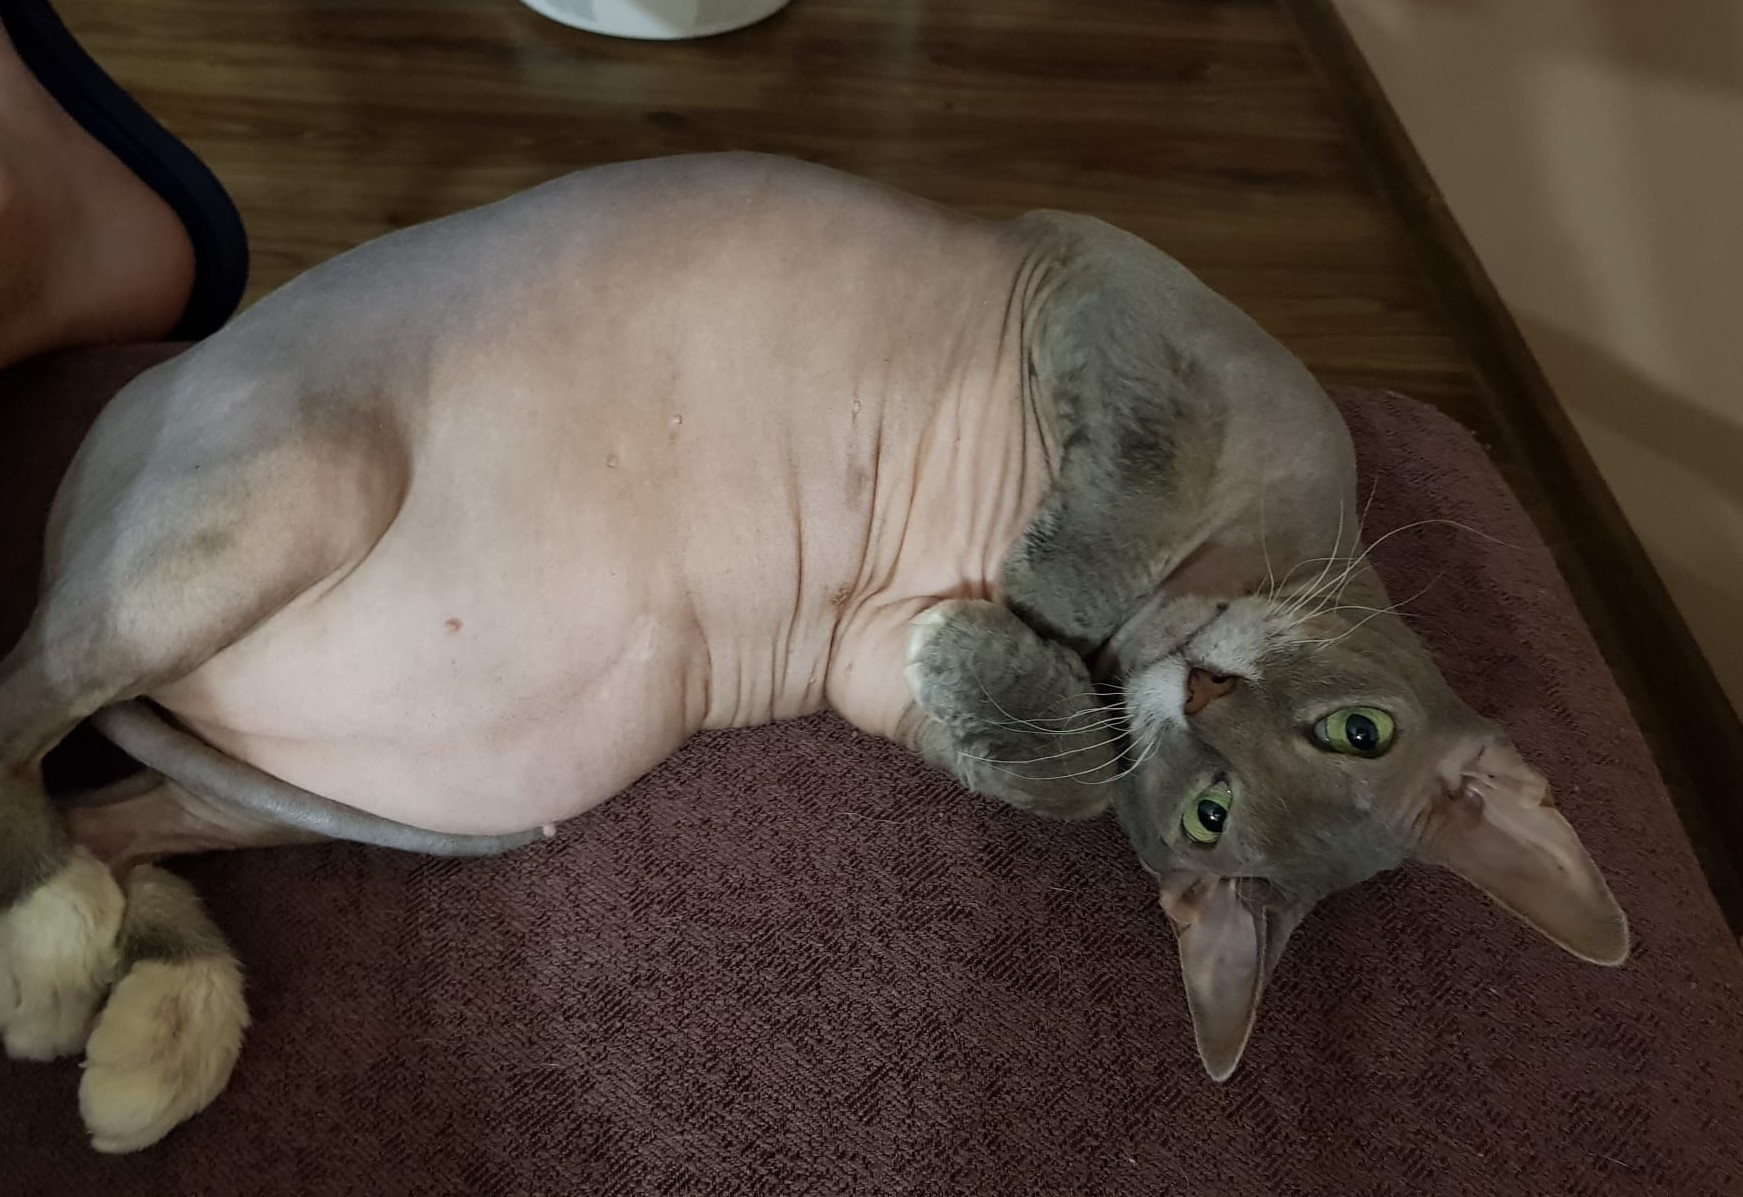

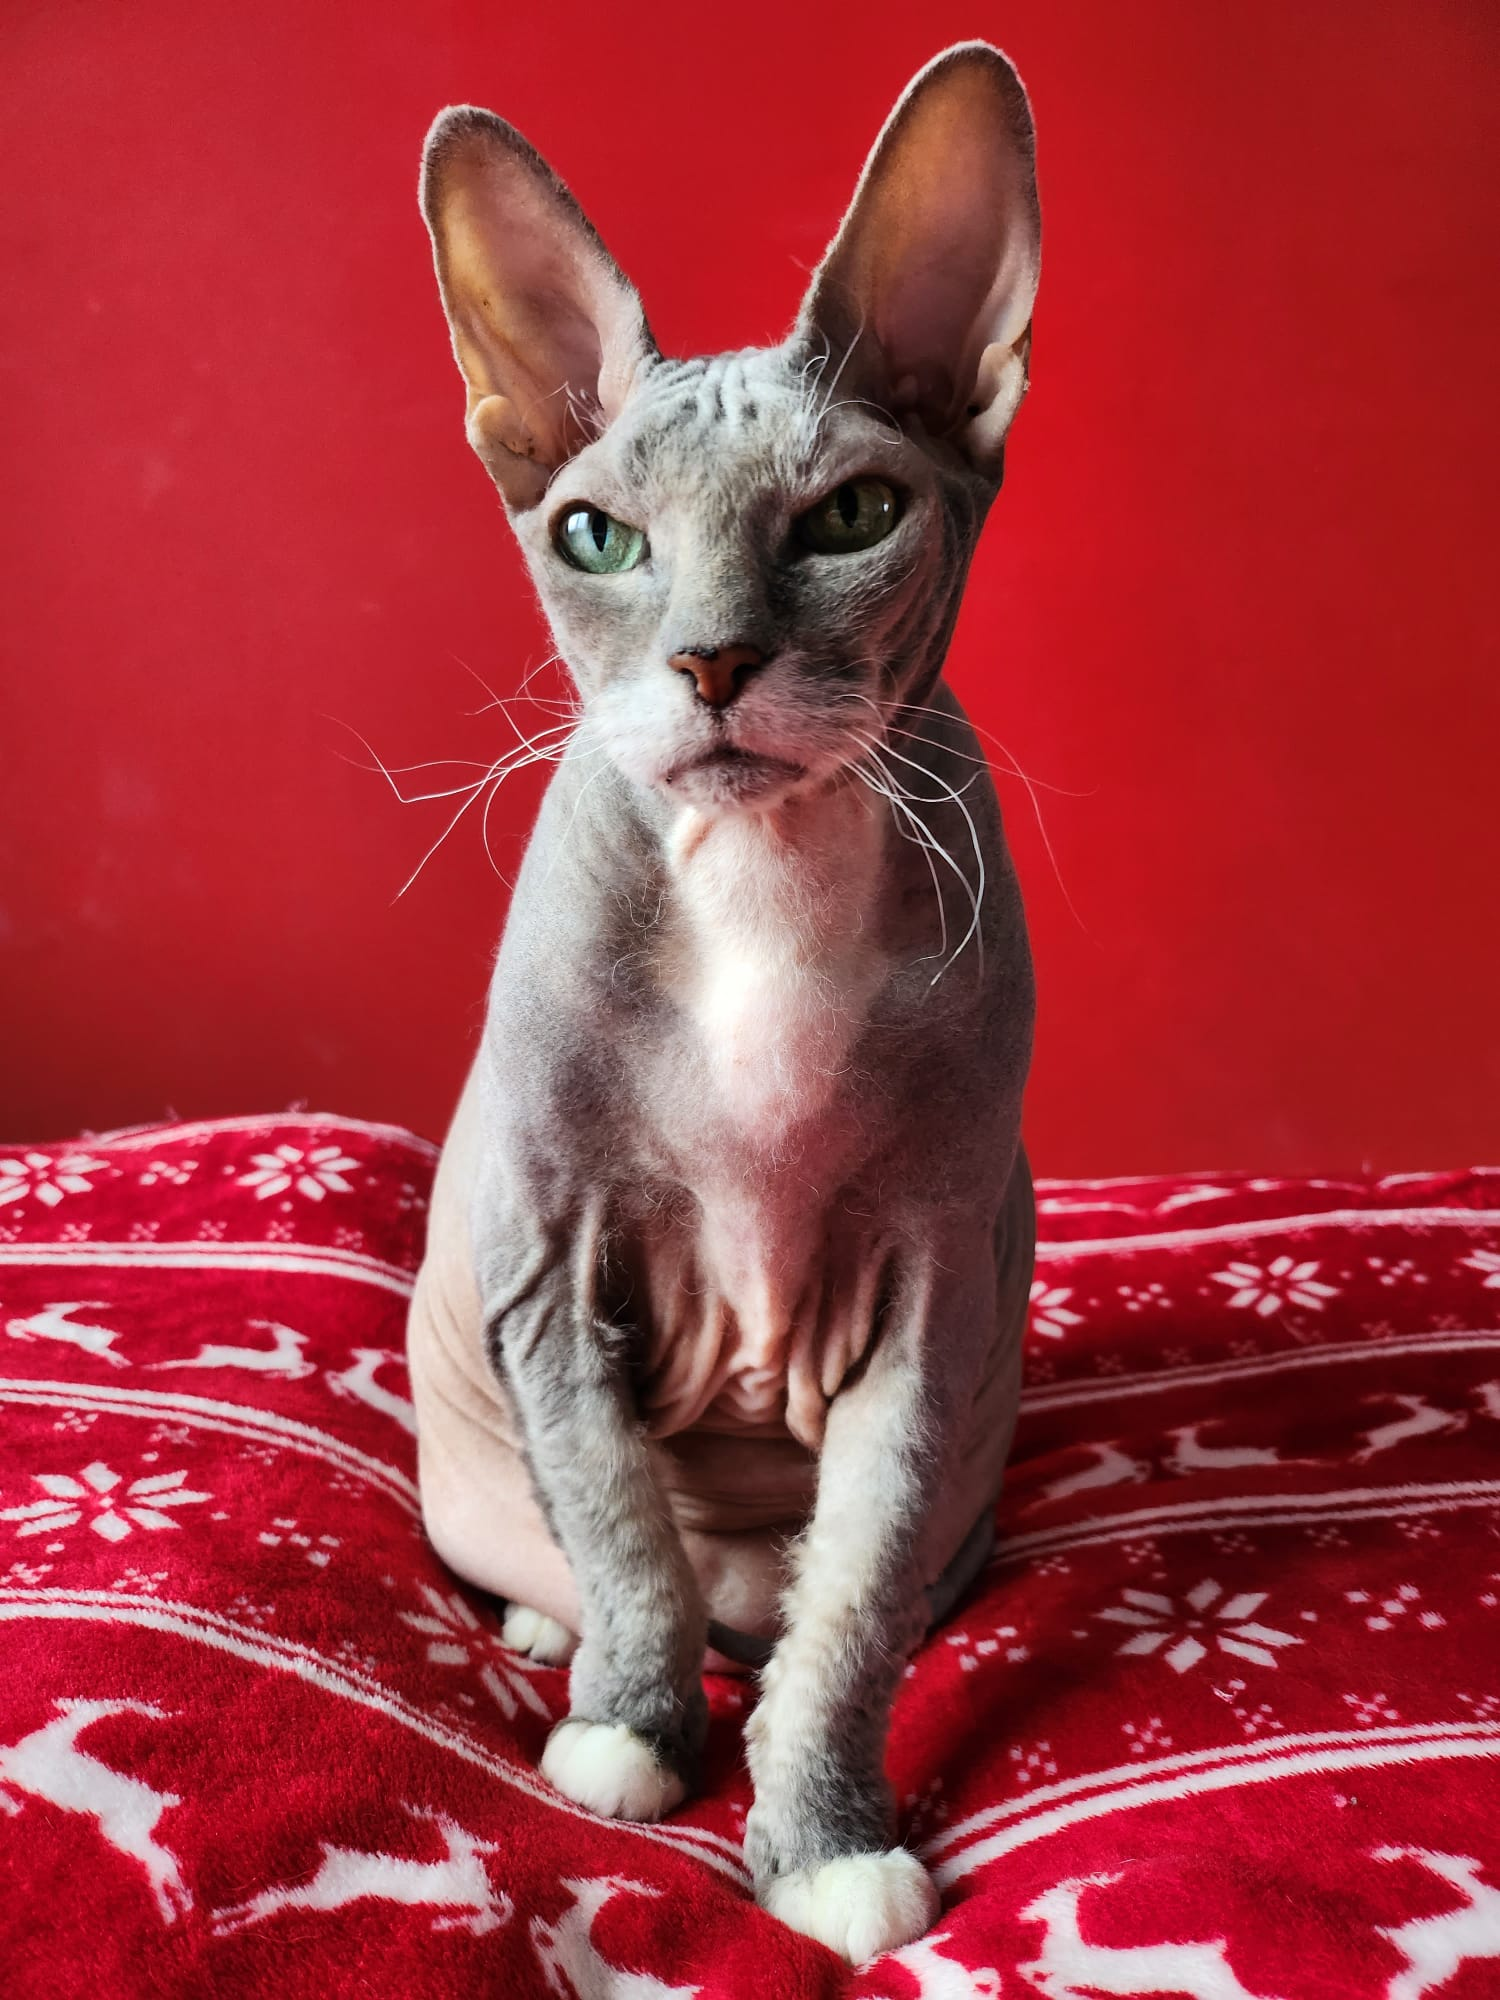